In [256]:
import random
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error


In [257]:
original_df = pd.read_csv(
    '/home/mwawaka/PycharmProjects/pythonProject1/CAT/data/NSE_data_all_stocks_2022_jan_to_may.csv')

df = original_df.copy()
df.rename(columns={'12m Low': '12mth Low', '12m High': '12mth High', 'Day Price': 'Close Price',
                   'Previous': 'Previous Close Price', 'Change': 'Change Close Price'}, inplace=True)


In [258]:
#convert the date column from type object to type Date
df['Date'] = pd.DatetimeIndex(df['Date'])
df.set_index('Date', inplace=True)

df['Close Price'] = pd.to_numeric(df['Close Price'], errors="coerce")

# Filling the null values with estimate values based on existing data 
df['Close Price'].interpolate(inplace=True)

df['Close Price'].isna().sum()

0

/usr/lib/python3.11/random.py:374: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return seq[self._randbelow(len(seq))]


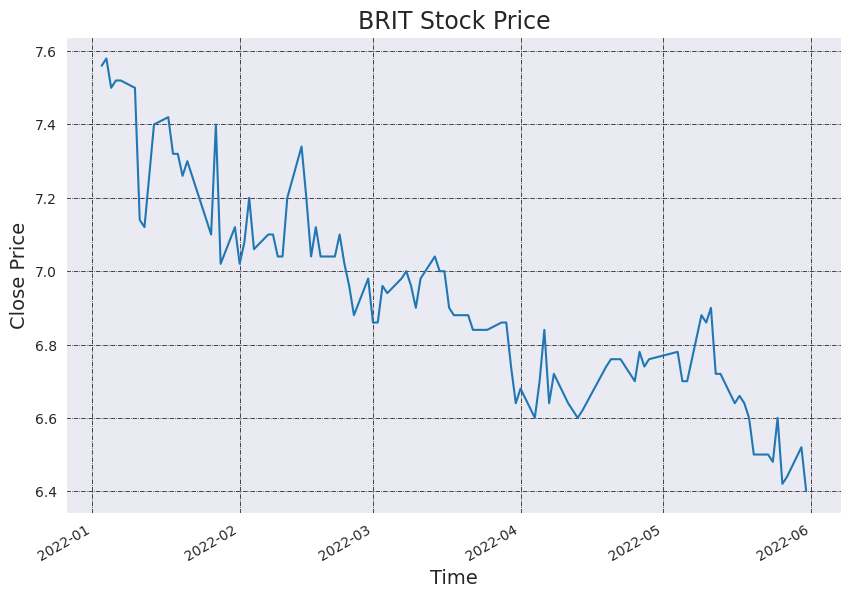

In [259]:
# Time series for Stocks for different companies
company_code = random.choice(df.Code)
company_df = df.loc[df['Code'] == company_code]

# Plotting the data
company_df['Close Price'].plot(figsize=(10, 7))
plt.title(company_code + " Stock Price", fontsize=17)
plt.ylabel('Close Price', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

In [260]:
company_df

,Code,Name,12mth Low,12mth High,Day Low,Day High,Close Price,Previous Close Price,Change Close Price,Change%,Volume,Adjusted Price
Date,,,,,,,,,,,,
2022-01-03,BRIT,Britam Holdings Plc,6,8.78,7.5,7.7,7.56,7.5,0.06,0.80%,"14,100",-
2022-01-04,BRIT,Britam Holdings Plc,6,8.78,7.5,7.66,7.58,7.56,0.02,0.26%,"9,300",-
2022-01-05,BRIT,Britam Holdings Plc,6,8.78,7.42,7.66,7.50,7.58,-0.08,1.06%,"5,800",-
2022-01-06,BRIT,Britam Holdings Plc,6,8.78,7.5,7.66,7.52,7.5,0.02,0.27%,"20,800",-
2022-01-07,BRIT,Britam Holdings Plc,6,8.78,7.4,7.52,7.52,7.52,-,-,"160,400",-
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-25,BRIT,Britam Holdings Plc,6.2,8.78,6.6,6.8,6.60,6.48,0.12,1.85%,"17,200",-
2022-05-26,BRIT,Britam Holdings Plc,6.2,8.78,6.4,6.6,6.42,6.6,-0.18,2.73%,"13,300",-
2022-05-27,BRIT,Britam Holdings Plc,6.2,8.78,6.4,6.7,6.44,6.42,0.02,0.31%,"13,000",-


In [261]:
#Using Close price and Exponential Moving Averages
new_df = company_df[['Close Price']]
ema_df = new_df.copy()
# Adding technical indicators
import pandas_ta as ta

# Exponential Moving Averages
ema_df['EMA'] = ta.ema(ema_df['Close Price'], length=5)
ema_df

,Close Price,EMA
Date,,
2022-01-03,7.56,NaN
2022-01-04,7.58,NaN
2022-01-05,7.50,NaN
2022-01-06,7.52,NaN
2022-01-07,7.52,7.536000
...,...,...
2022-05-25,6.60,6.559638
2022-05-26,6.42,6.513092
2022-05-27,6.44,6.488728


# Exponential Moving Average

- The average is calculated over a 5 day period
- the first 4 entries in our data will have a NaN value since there were not proceeding values from which the EMA could be calculated.
- Will drop the rows with NaN values

In [262]:
# Dropping the null values
ema_df.dropna(subset=['EMA'], inplace=True)


## First, let’s take a quick look at a plot of our data now to get an idea of how the EMA value tracks with the adjusted closing price.
## We can see here the EMA tracks nicely.

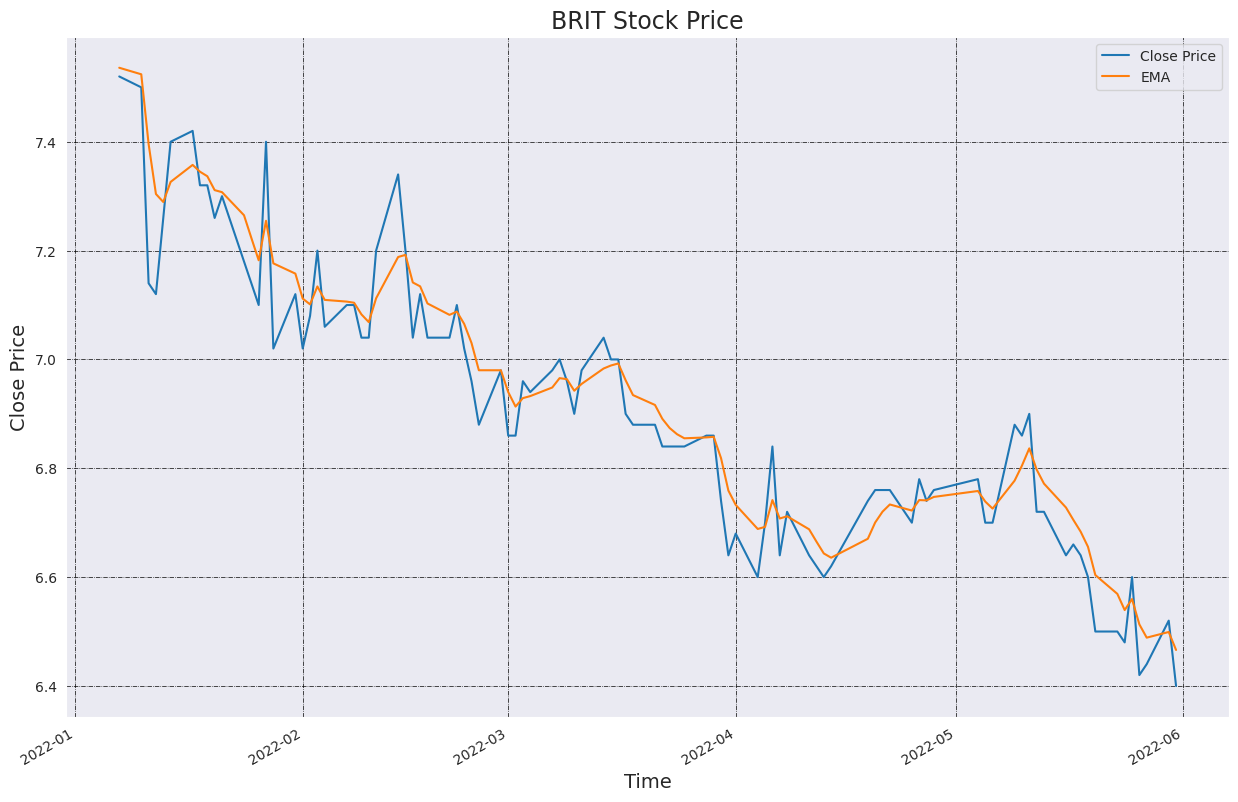

In [263]:
# Visualizations
ema_df[['Close Price', 'EMA']].plot(figsize=(15, 10))
plt.title(company_code + " Stock Price", fontsize=17)
plt.ylabel('Close Price', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

# Train and Test Split

In [264]:
# Train and Test split
feature = ema_df[['EMA']]
target = ema_df[['Close Price']]
X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=.2, random_state=42)

# Model Selection and Training

In [265]:
# Model Selection and Training

# Create the model
lin_reg = LinearRegression()

# Train the model
lin_reg.fit(X_train,y_train)

# Making predictions
y_pred = lin_reg.predict(X_test)

In [266]:
y_test['Close Price'].values.shape

(20,)

# Visualization

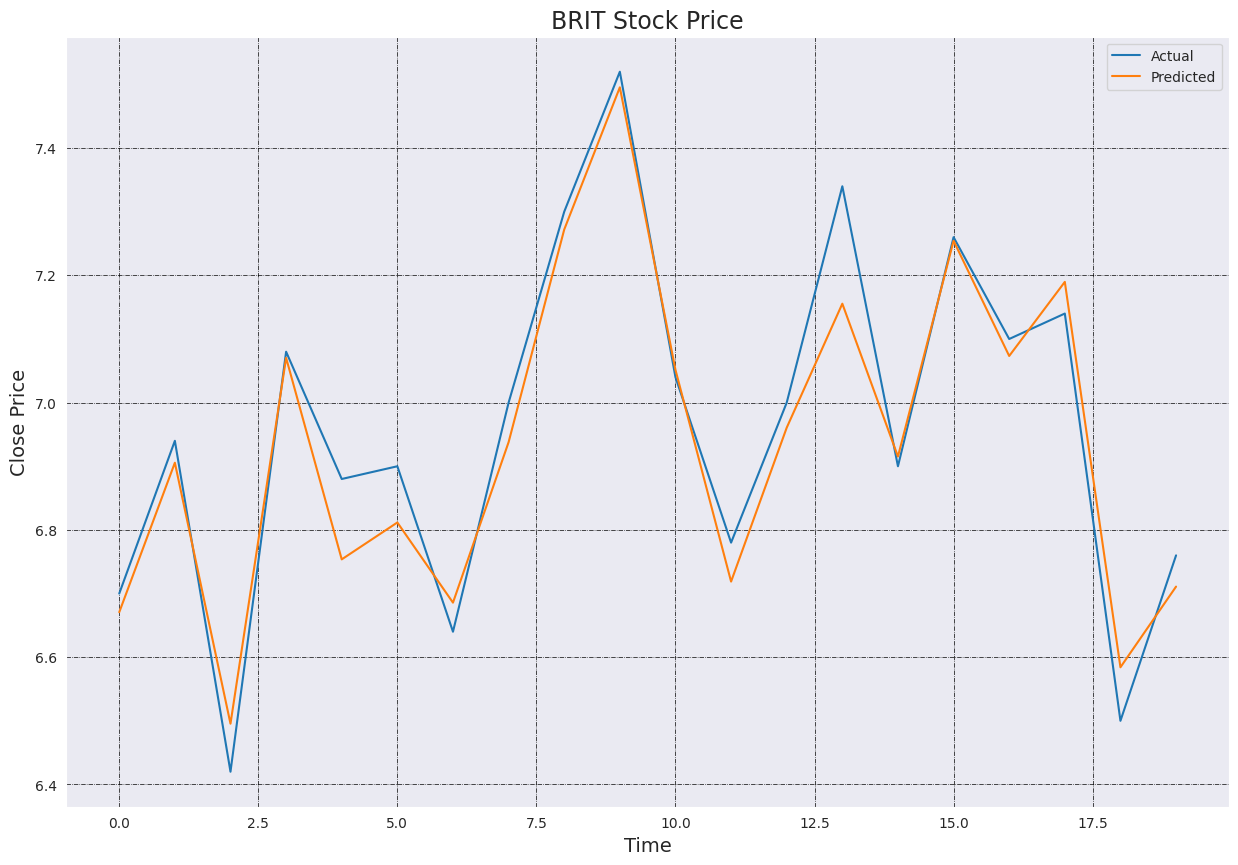

,Actual,Predicted
0,6.70,6.670654
1,6.94,6.905583
2,6.42,6.495452
3,7.08,7.070395
4,6.88,6.753704
5,6.90,6.811680
6,6.64,6.685697
7,7.00,6.937839
8,7.30,7.271991
9,7.52,7.495472


In [269]:
results=pd.DataFrame({
    "Actual":y_test['Close Price'].values,
    "Predicted":y_pred.flatten()
})


results[['Actual', 'Predicted']].plot(figsize=(15, 10))
plt.title(company_code + " Stock Price", fontsize=17)
plt.ylabel('Close Price', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()
results

# Validating the model

In [268]:
# R^2 value of the model
# r_sq = lin_reg.score()